In [1]:
# Import required librarriws
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
db=pd.read_csv("./data/SalesKaggle3.csv")

In [3]:
db.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
db.shape

(198917, 14)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
Order               198917 non-null int64
File_Type           198917 non-null object
SKU_number          198917 non-null int64
SoldFlag            75996 non-null float64
SoldCount           75996 non-null float64
MarketingType       198917 non-null object
ReleaseNumber       198917 non-null int64
New_Release_Flag    198917 non-null int64
StrengthFactor      198917 non-null float64
PriceReg            198917 non-null float64
ReleaseYear         198917 non-null int64
ItemCount           198917 non-null int64
LowUserPrice        198917 non-null float64
LowNetPrice         198917 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [6]:
db.dtypes

Order                 int64
File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object

In [7]:
db.File_Type.value_counts()

Active        122921
Historical     75996
Name: File_Type, dtype: int64

In [8]:
# historical data has the value 0 and 1 
db.SoldFlag.value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

In [11]:
# all the Active type  has sold columns : NaN
db.SoldFlag.isnull().sum()

122921

In [19]:
db.MarketingType.value_counts()

S    100946
D     97971
Name: MarketingType, dtype: int64

In [9]:
# 63000 not sold, 12996 sold out of 75996  historical data
db.SoldFlag.value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

In [14]:
db.SKU_number.value_counts()

2363390    2
631854     2
1519022    2
775601     2
621621     2
          ..
293832     1
551882     1
3730421    1
2534410    1
264193     1
Name: SKU_number, Length: 133360, dtype: int64

In [21]:
db.loc[db.SKU_number==2363390]

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
22508,23017,Historical,2363390,0.0,0.0,D,2,1,633732.0000,181.72,1980,44,143.96,53.66
172915,182026,Active,2363390,NaN,NaN,D,2,1,948456.8338,181.72,1980,44,4.00,53.66


In [33]:
db[db.SoldFlag.notnull()]["SKU_number"].value_counts()

133119    1
148061    1
244322    1
625252    1
623205    1
         ..
657874    1
115271    1
132394    1
527659    1
295445    1
Name: SKU_number, Length: 75996, dtype: int64

In [34]:
db[db.SoldFlag.isnull()]["SKU_number"].value_counts()

110648     1
598926     1
608386     1
614535     1
843989     1
          ..
644591     1
3485168    1
867826     1
341491     1
526337     1
Name: SKU_number, Length: 122921, dtype: int64

In [41]:
(db.SKU_number.value_counts()==2).sum()

65557

In [46]:
db.SoldCount.value_counts()

0.0     63000
1.0      8179
2.0      2545
3.0      1018
4.0       483
5.0       253
6.0       149
7.0       121
8.0        62
9.0        32
10.0       30
12.0       28
11.0       21
14.0       11
13.0       10
16.0        9
15.0        6
18.0        5
19.0        4
22.0        4
27.0        3
17.0        3
26.0        3
24.0        2
21.0        2
36.0        2
35.0        1
73.0        1
69.0        1
34.0        1
51.0        1
30.0        1
33.0        1
28.0        1
25.0        1
40.0        1
20.0        1
Name: SoldCount, dtype: int64

In [49]:
db_active=db[db.SoldFlag.isnull()].copy()


In [51]:
db_history=db[db.SoldFlag.notnull()].copy()


In [52]:
db_h_sold=db.loc[db.SoldFlag==1].copy()

In [54]:
db_h_sold.SoldCount.value_counts()

1.0     8179
2.0     2545
3.0     1018
4.0      483
5.0      253
6.0      149
7.0      121
8.0       62
9.0       32
10.0      30
12.0      28
11.0      21
14.0      11
13.0      10
16.0       9
15.0       6
18.0       5
22.0       4
19.0       4
27.0       3
17.0       3
26.0       3
36.0       2
21.0       2
24.0       2
69.0       1
20.0       1
28.0       1
40.0       1
25.0       1
35.0       1
73.0       1
34.0       1
30.0       1
51.0       1
33.0       1
Name: SoldCount, dtype: int64

In [59]:
db_h_sold.sort_values(by=["SoldCount"],ascending=False)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
7456,7698,Historical,665269,1.0,73.0,D,2,1,77114.0,35.50,2010,290,25.99,22.17
16465,16865,Historical,613864,1.0,69.0,D,0,0,7237.0,80.75,2012,44,0.00,0.00
7882,8135,Historical,141848,1.0,51.0,D,2,1,126988.0,13.89,2006,86,25.98,11.95
42090,47860,Historical,254518,1.0,40.0,S,10,1,472673.0,104.95,2011,92,274.51,66.54
28558,29180,Historical,55769,1.0,36.0,D,1,0,157486.0,45.95,2000,178,48.98,44.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,21777,Historical,876761,1.0,1.0,D,4,1,713978.0,142.31,2011,27,177.54,57.89
21291,21780,Historical,349597,1.0,1.0,D,7,1,4206095.0,0.00,2004,11,88.98,28.99
21294,21783,Historical,335916,1.0,1.0,D,1,0,1534619.0,84.95,1995,18,80.37,62.16
21297,21786,Historical,2559740,1.0,1.0,D,1,0,1668703.0,165.00,1994,23,114.73,43.98


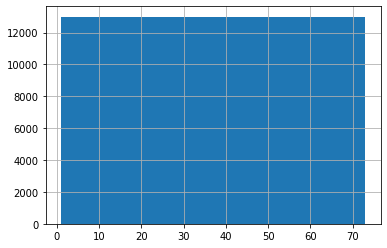